In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cases_age = pd.read_csv('AgeGroupDetails.csv')
cases_age.drop('Sno',axis=1,inplace=True)


In [3]:
cases_age

,AgeGroup,TotalCases,Percentage
0,0-9,22,3.18%
1,10-19,27,3.90%
2,20-29,172,24.86%
3,30-39,146,21.10%
4,40-49,112,16.18%
5,50-59,77,11.13%
6,60-69,89,12.86%
7,70-79,28,4.05%
8,>=80,10,1.45%
9,Missing,9,1.30%


# Total Cases vs Age Group

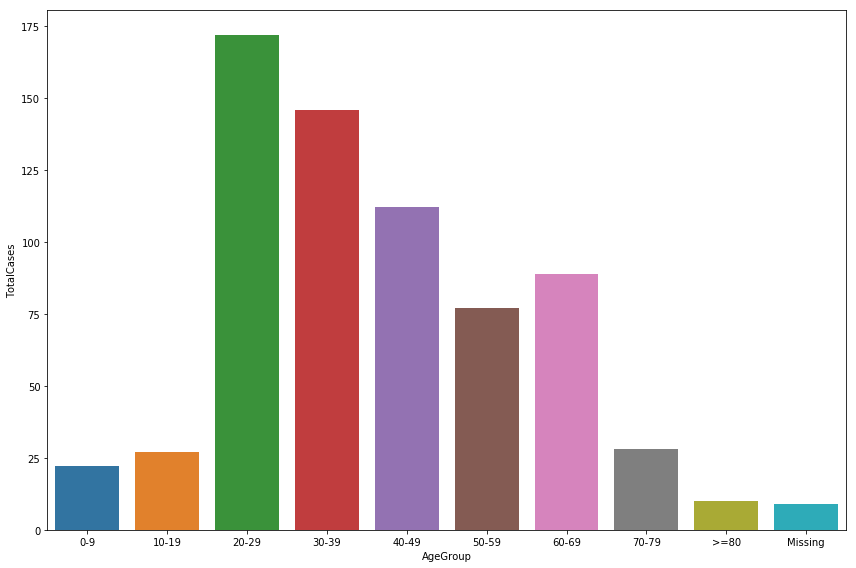

In [184]:
plt.figure(figsize=(12,8))
sns.barplot(x='AgeGroup',y='TotalCases',data=cases_age)
plt.tight_layout()
plt.savefig('images/Total Cases vs Age Group.png')

In [5]:
covid_cases_india = pd.read_csv('covid_19_india.csv')

covid_cases_india.head()
covid_cases_india.drop('Sno',axis=1,inplace=True)

In [6]:
covid_cases_india.head()


,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [7]:
covid_cases_india['Date'] = pd.to_datetime(covid_cases_india['Date'])
covid_cases_india.ConfirmedIndianNational = covid_cases_india.ConfirmedIndianNational.str.replace('-', '0')
covid_cases_india.ConfirmedForeignNational = covid_cases_india.ConfirmedForeignNational.str.replace('-', '0')
covid_cases_india['ConfirmedIndianNational'] = covid_cases_india['ConfirmedIndianNational'].astype(int)
covid_cases_india['ConfirmedForeignNational'] = covid_cases_india['ConfirmedForeignNational'].astype(int)


In [8]:
covid_cases_india.dtypes

Date                        datetime64[ns]
Time                                object
State/UnionTerritory                object
ConfirmedIndianNational              int32
ConfirmedForeignNational             int32
Cured                                int64
Deaths                               int64
Confirmed                            int64
dtype: object

In [9]:
covid_cases_india['Date'] = covid_cases_india['Date'].dt.strftime('%d/%m/%Y')

In [10]:
covid_cases_india.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,30/01/2020,6:00 PM,Kerala,1,0,0,0,1
1,31/01/2020,6:00 PM,Kerala,1,0,0,0,1
2,02/01/2020,6:00 PM,Kerala,2,0,0,0,2
3,02/02/2020,6:00 PM,Kerala,3,0,0,0,3
4,02/03/2020,6:00 PM,Kerala,3,0,0,0,3


In [11]:
latest_cases = covid_cases_india.groupby(['State/UnionTerritory']).last()
latest_cases.reset_index(inplace=True)

# Current Confirmed cases by states

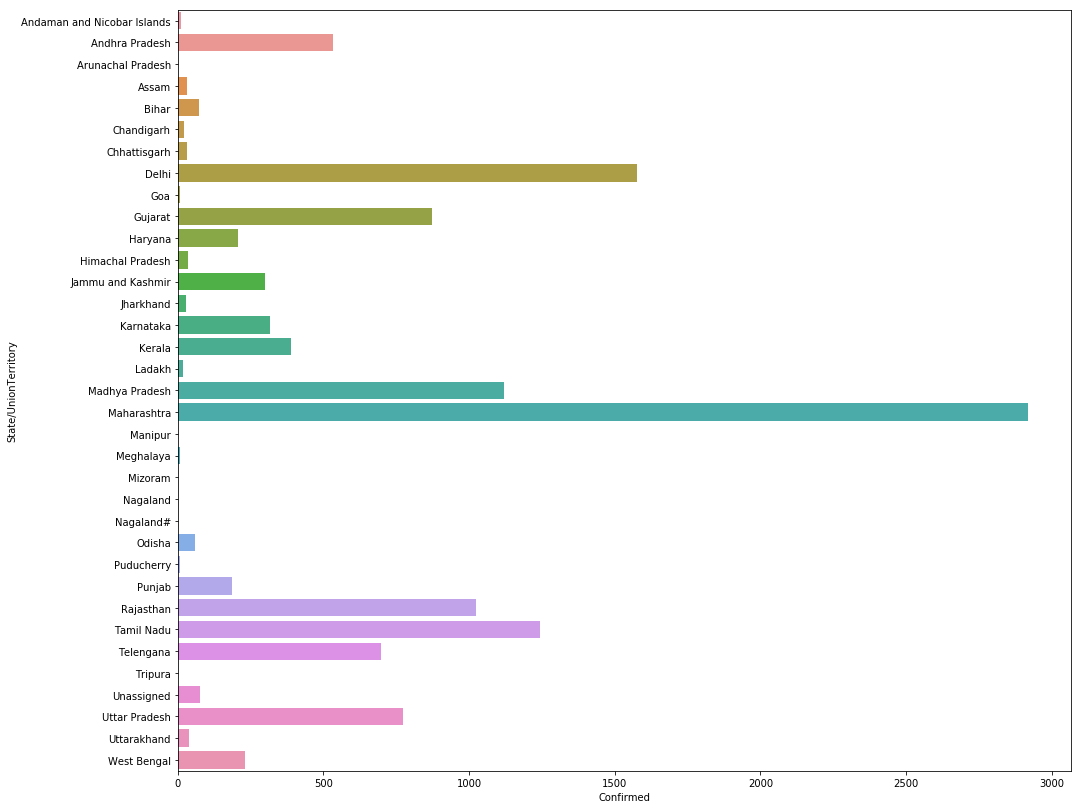

In [185]:
plt.figure(figsize=(16,14))
sns.barplot(x='Confirmed',y='State/UnionTerritory',data=latest_cases)
plt.savefig('images/Current Confirmed cases by states.png')

# Current death cases by states

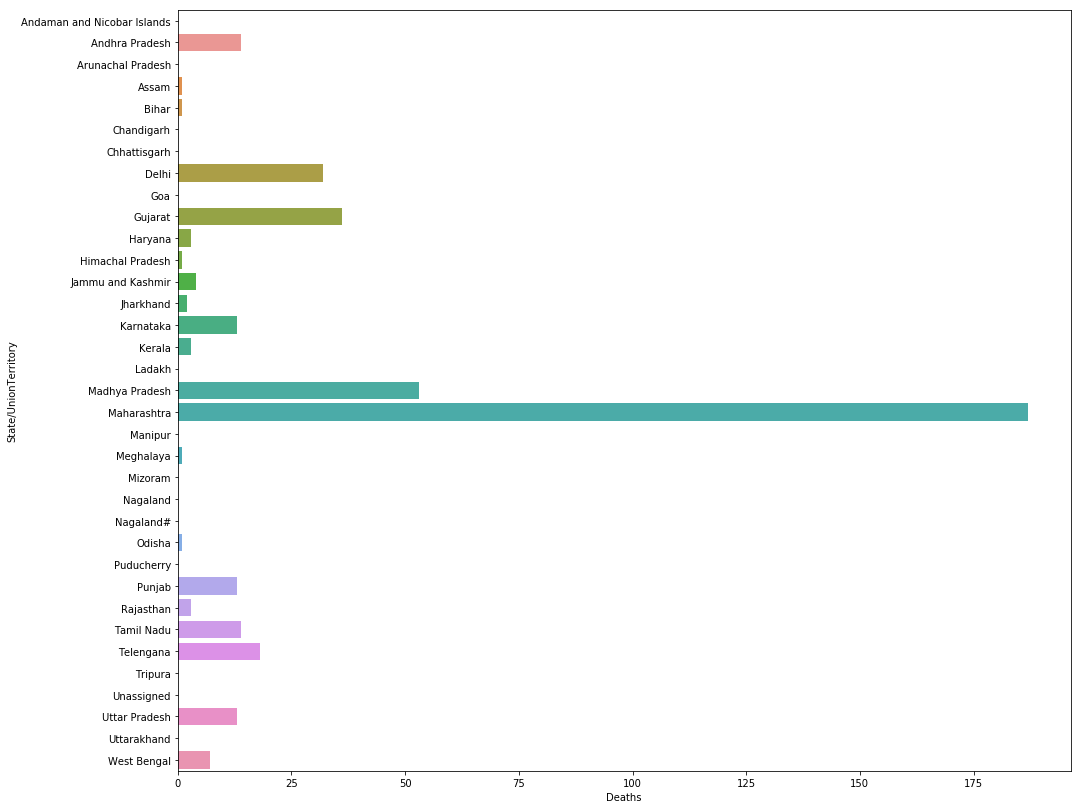

In [186]:
plt.figure(figsize=(16,14))
sns.barplot(x='Deaths',y='State/UnionTerritory',data=latest_cases)
plt.savefig('images/Current death cases by states.png')

# Current cured cases by states

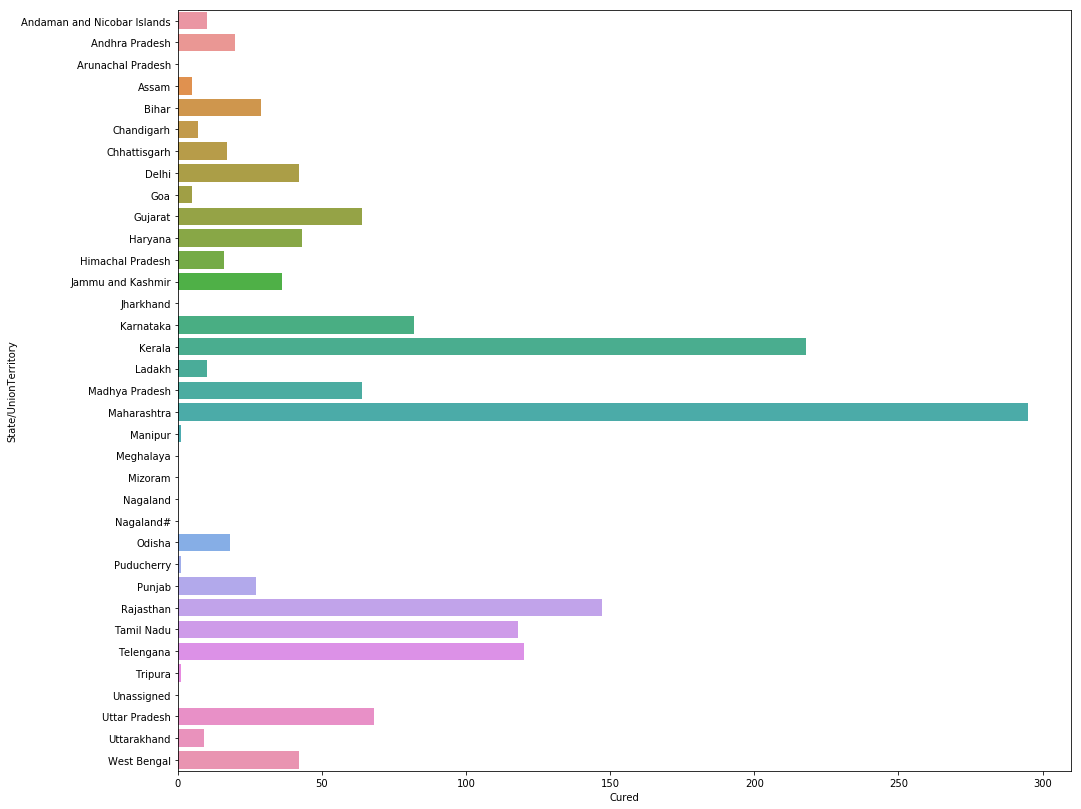

In [187]:
plt.figure(figsize=(16,14))
sns.barplot(x='Cured',y='State/UnionTerritory',data=latest_cases)
plt.savefig('images/Current cured cases by states.png')

In [109]:
latest_cases_sorted_confirmed = latest_cases.sort_values(by=['Confirmed'],ascending=False)
latest_cases_sorted_deaths = latest_cases.sort_values(by=['Deaths'],ascending=False)
latest_cases_sorted_cured = latest_cases.sort_values(by=['Cured'],ascending=False)


# States by Confirmed cases in desc. order (Latest)

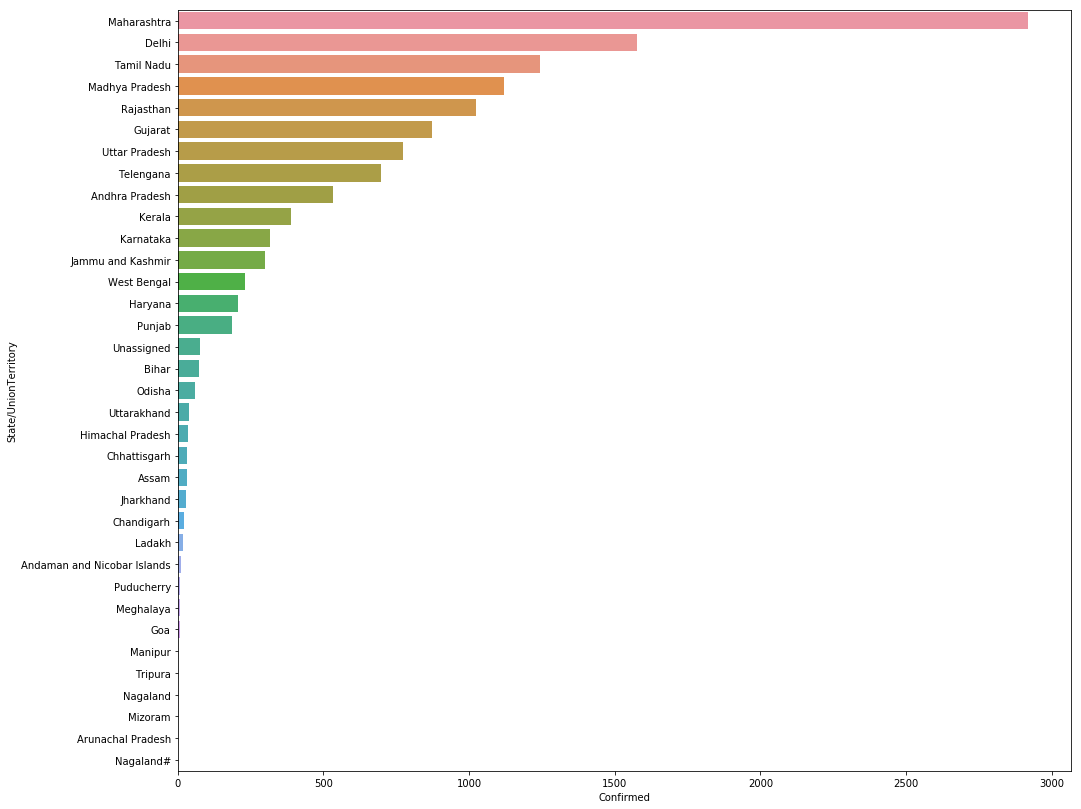

In [188]:
plt.figure(figsize=(16,14))
sns.barplot(x='Confirmed',y='State/UnionTerritory',data=latest_cases_sorted_confirmed)
plt.savefig('images/States by Confirmed cases in desc. order_Latest.png')


# States by Death cases in desc. order (Latest)

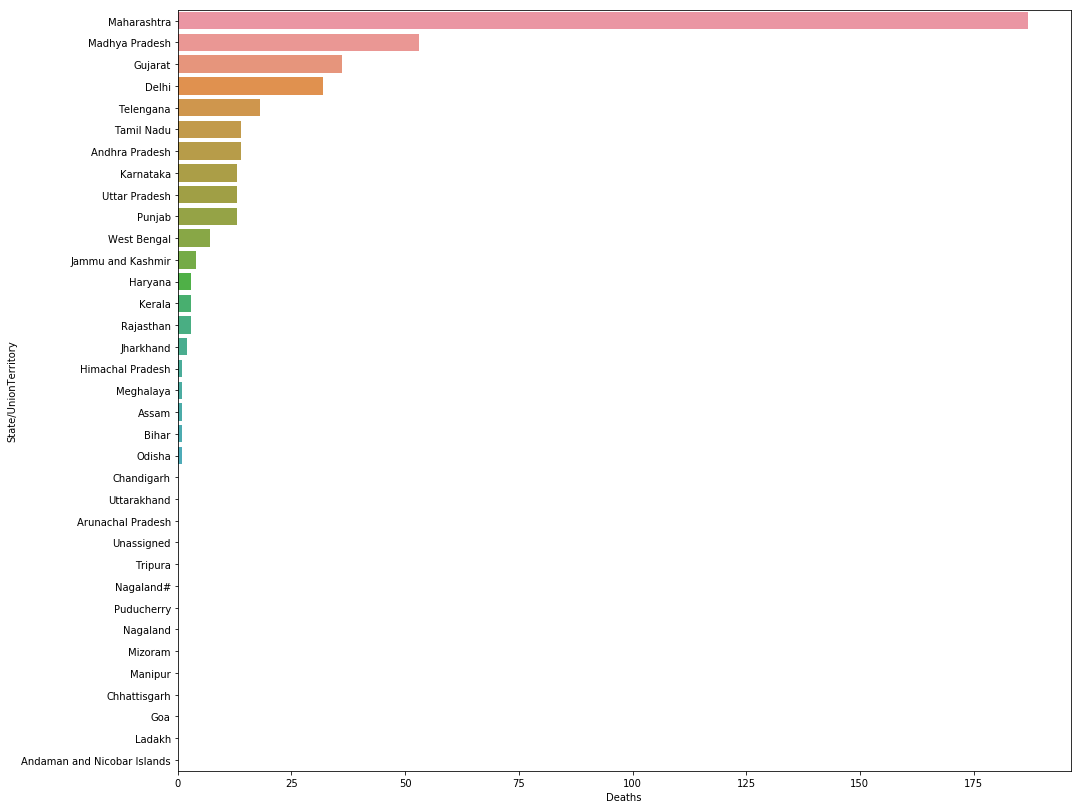

In [189]:
plt.figure(figsize=(16,14))
sns.barplot(x='Deaths',y='State/UnionTerritory',data=latest_cases_sorted_deaths)
plt.savefig('images/States by Death cases in desc. order_Latest.png')

# States by Cured cases in desc. order (Latest)

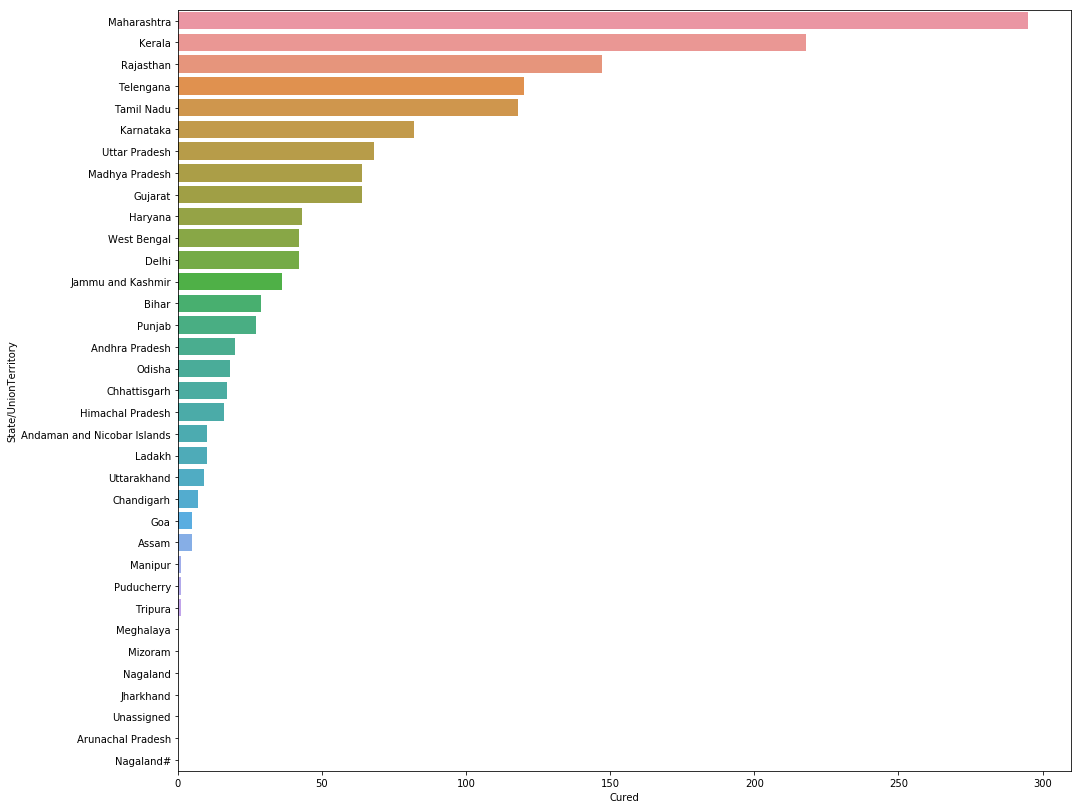

In [190]:
plt.figure(figsize=(16,14))
sns.barplot(x='Cured',y='State/UnionTerritory',data=latest_cases_sorted_cured)
plt.savefig('images/States by Cured cases in desc. order_Latest.png')


In [15]:
latest_cases.head()

,State/UnionTerritory,Date,Time,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,Andaman and Nicobar Islands,16/04/2020,5:00 PM,0,0,10,0,11
1,Andhra Pradesh,16/04/2020,5:00 PM,0,0,20,14,534
2,Arunachal Pradesh,16/04/2020,5:00 PM,0,0,0,0,1
3,Assam,16/04/2020,5:00 PM,0,0,5,1,33
4,Bihar,16/04/2020,5:00 PM,0,0,29,1,74


In [16]:
Top_10_confirmed = latest_cases.sort_values(by=['Confirmed'],ascending=False).head(10)
Top_10_deaths = latest_cases.sort_values(by=['Deaths'],ascending=False).head(10)
Top_10_cured = latest_cases.sort_values(by=['Cured'],ascending=False).head(10)
Top_5_confirmed = latest_cases.sort_values(by=['Confirmed'],ascending=False).head(5)
Top_5_deaths = latest_cases.sort_values(by=['Deaths'],ascending=False).head(5)
Top_5_cured = latest_cases.sort_values(by=['Cured'],ascending=False).head(5)

# Current Top 5 States with confirmed cases

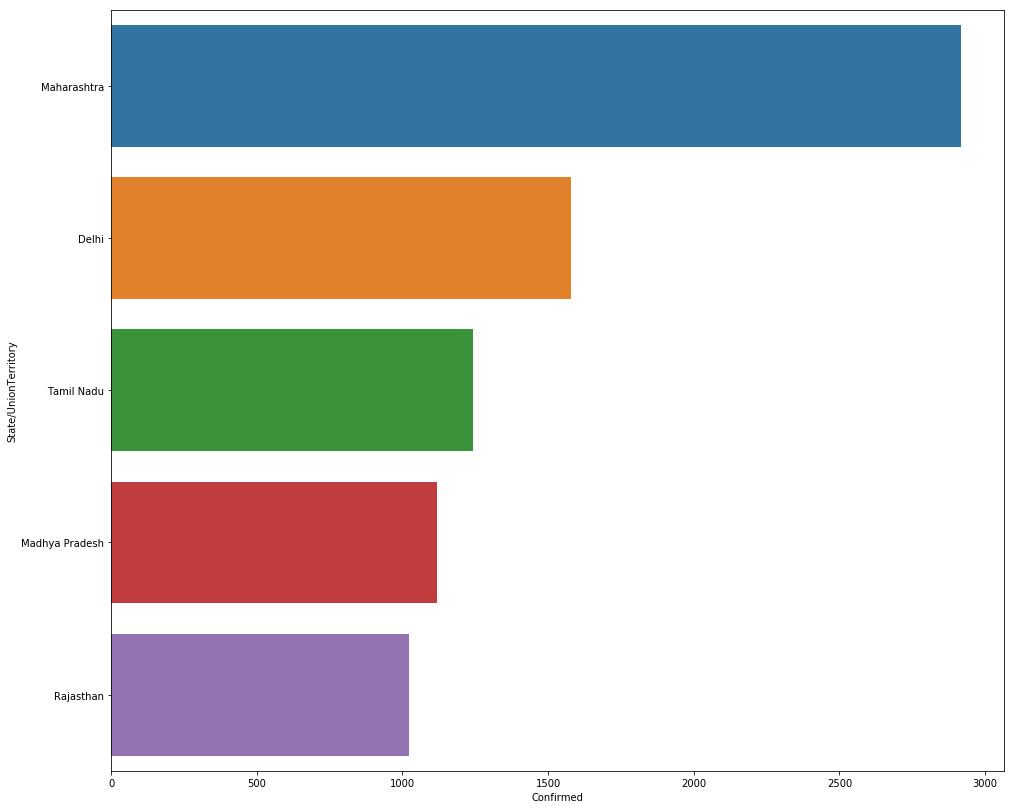

In [191]:
plt.figure(figsize=(16,14))
sns.barplot(x='Confirmed',y='State/UnionTerritory',data=Top_5_confirmed)
plt.savefig('images/Current Top 5 States with confirmed cases.png')

# Current Top 5 States with death cases

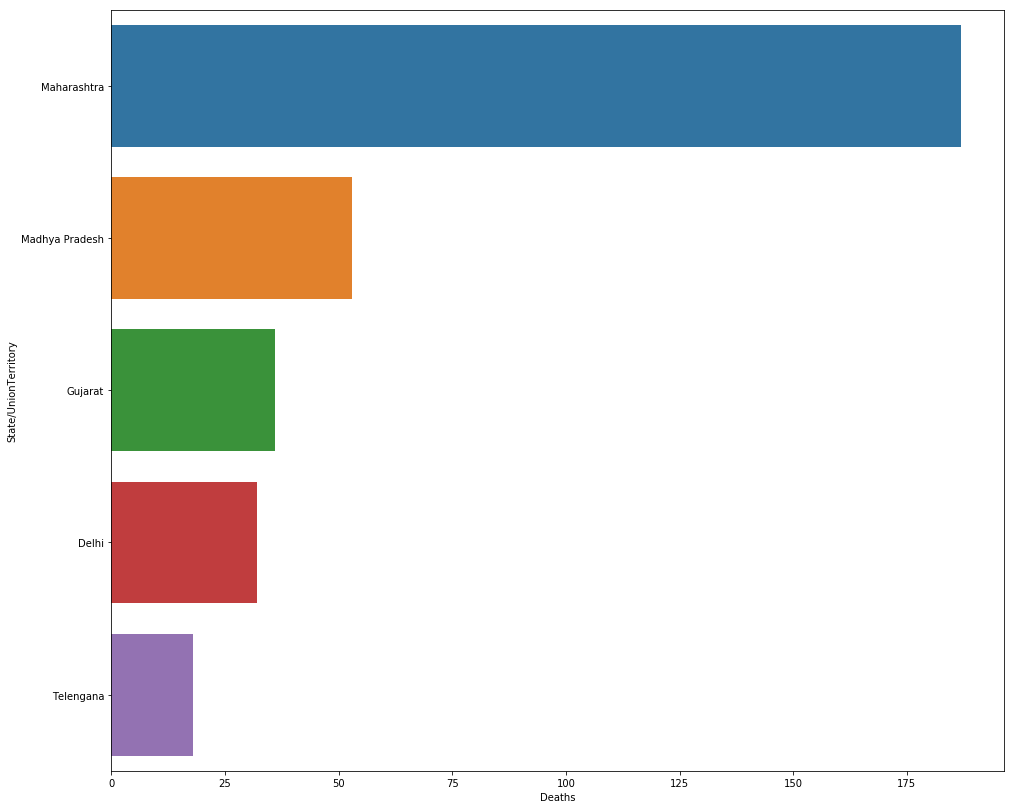

In [192]:
plt.figure(figsize=(16,14))
sns.barplot(x='Deaths',y='State/UnionTerritory',data=Top_5_deaths)
plt.savefig('images/Current Top 5 States with death cases.png')


# Current Top 5 States with cured cases

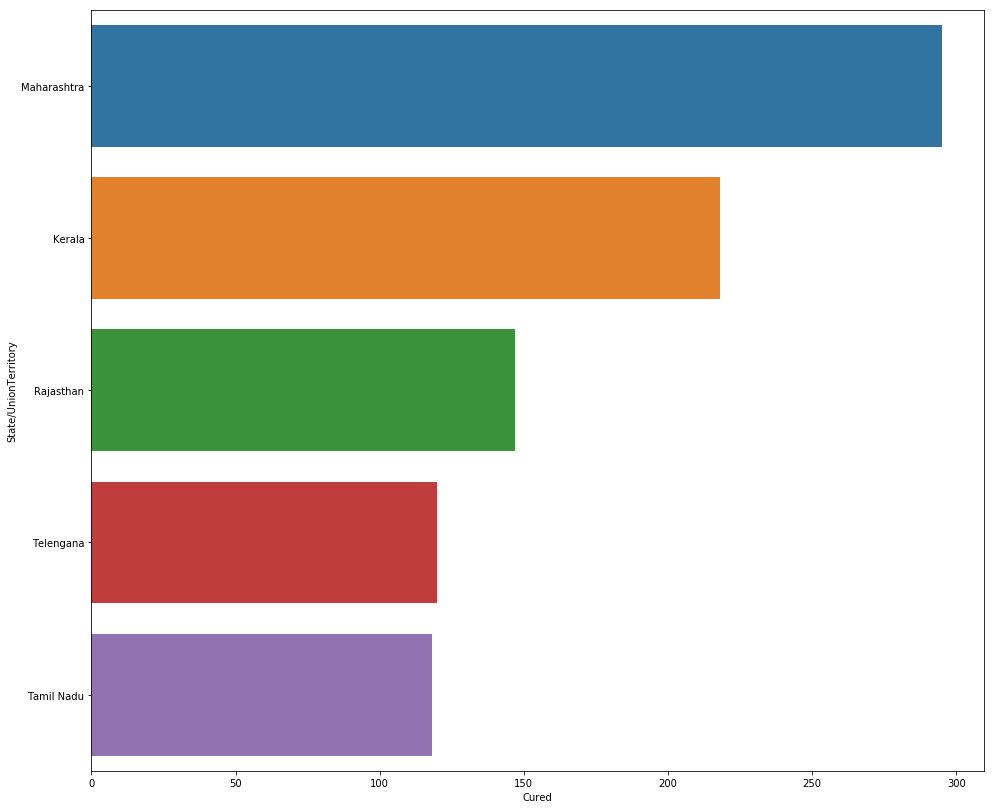

In [193]:
plt.figure(figsize=(16,14))
sns.barplot(x='Cured',y='State/UnionTerritory',data=Top_5_cured)
plt.savefig('images/Current Top 5 States with cured cases.png')


# Current Top 10 States with Confirmed cases

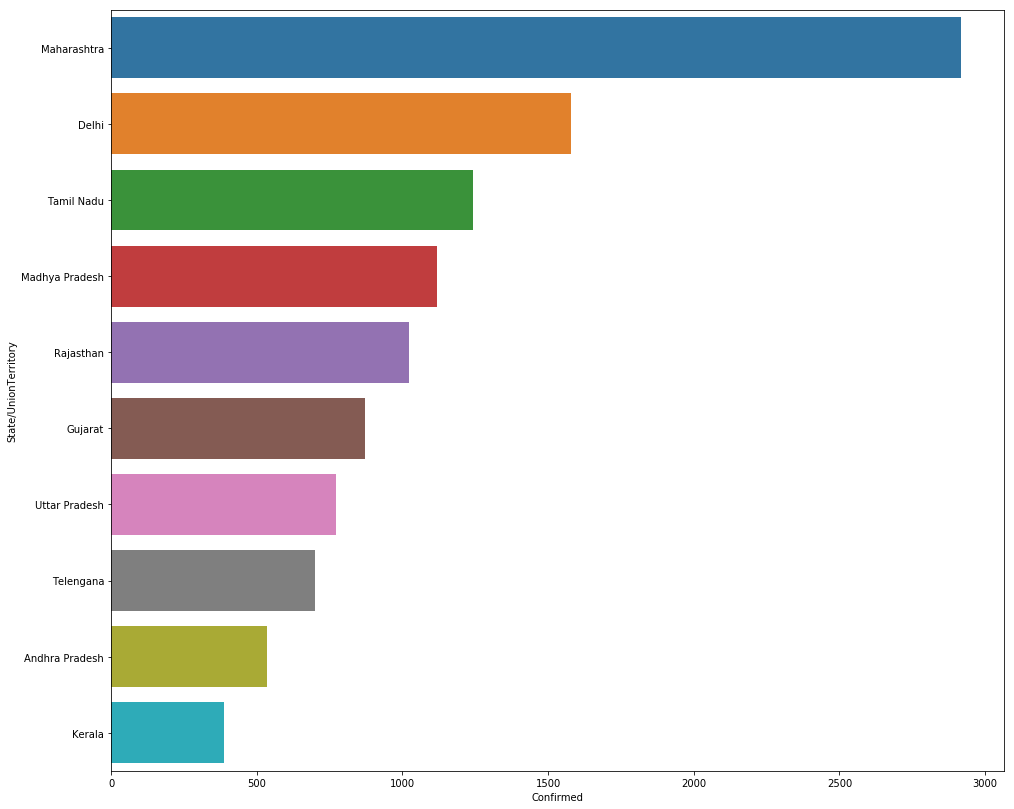

In [194]:
plt.figure(figsize=(16,14))
sns.barplot(x='Confirmed',y='State/UnionTerritory',data=Top_10_confirmed)
plt.savefig('images/Current Top 10 States with Confirmed cases.png')


# Current Top 10 States with Death cases

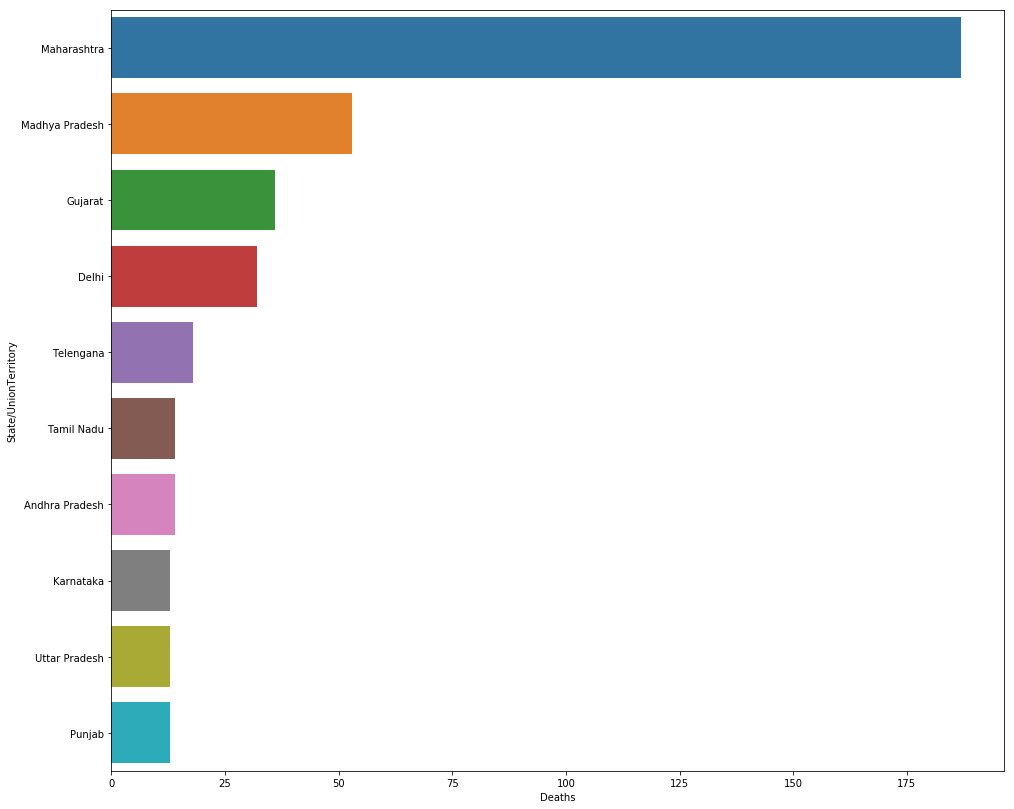

In [195]:
plt.figure(figsize=(16,14))
sns.barplot(x='Deaths',y='State/UnionTerritory',data=Top_10_deaths)
plt.savefig('images/Current Top 10 States with Death cases.png')


# Current Top 10 States with cured cases

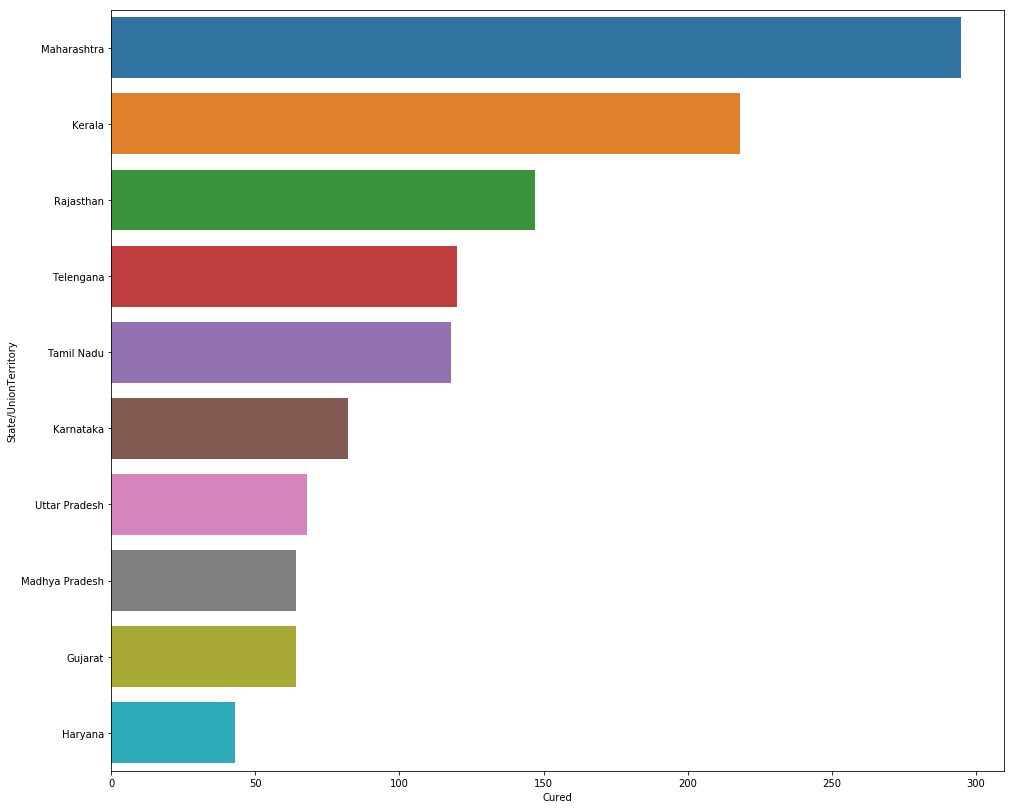

In [196]:
plt.figure(figsize=(16,14))
sns.barplot(x='Cured',y='State/UnionTerritory',data=Top_10_cured)
plt.savefig('images/Current Top 10 States with cured cases.png')

In [41]:
ICMRTestingDetails = pd.read_csv('ICMRTestingDetails.csv')
ICMRTestingLabs = pd.read_csv('ICMRTestingLabs.csv')
ICMRTestingDetails.head()

,SNo,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases,Source
0,1,13/03/20 18:00,6500.0,5900.0,78.0,Press_Release_ICMR_13March2020.pdf
1,2,18/03/20 18:00,13125.0,12235.0,150.0,ICMR_website_update_18March_6PM_IST.pdf
2,3,19/03/20 18:00,14175.0,13285.0,182.0,ICMR_website_update_19March_6PM_IST.pdf
3,4,20/03/20 18:00,15404.0,14514.0,236.0,ICMR_website_update_20March_6PM_IST.pdf
4,5,21/03/20 18:00,16911.0,16021.0,315.0,ICMR_website_update_21March_6PM_IST.pdf


In [42]:
ICMRTestingDetails.drop('SNo',axis=1,inplace=True)

In [43]:

ICMRTestingDetails['DateTime'] = pd.to_datetime(ICMRTestingDetails['DateTime'])
ICMRTestingDetails['DateTime'] = ICMRTestingDetails['DateTime'].dt.strftime('%d/%m/%Y')

In [45]:
ICMRTestingDetails.shape

(31, 5)

In [46]:
ICMRTestingDetails.dropna(thresh=3,inplace=True)

In [47]:
ICMRTestingDetails.shape

(26, 5)

In [51]:
ICMRTestingDetails['PercentageOfPositiveCases'] = (ICMRTestingDetails['TotalPositiveCases']/ICMRTestingDetails['TotalSamplesTested'])*100

In [52]:
ICMRTestingDetails.head()

,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases,Source,PercentageOfPositiveCases
0,13/03/2020,6500.0,5900.0,78.0,Press_Release_ICMR_13March2020.pdf,1.200000
1,18/03/2020,13125.0,12235.0,150.0,ICMR_website_update_18March_6PM_IST.pdf,1.142857
2,19/03/2020,14175.0,13285.0,182.0,ICMR_website_update_19March_6PM_IST.pdf,1.283951
3,20/03/2020,15404.0,14514.0,236.0,ICMR_website_update_20March_6PM_IST.pdf,1.532070
4,21/03/2020,16911.0,16021.0,315.0,ICMR_website_update_21March_6PM_IST.pdf,1.862693


In [70]:
ICMRTestingDetails

,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases,Source,PercentageOfPositiveCases
0,13/03/2020,6500.0,5900.0,78.0,Press_Release_ICMR_13March2020.pdf,1.200000
1,18/03/2020,13125.0,12235.0,150.0,ICMR_website_update_18March_6PM_IST.pdf,1.142857
2,19/03/2020,14175.0,13285.0,182.0,ICMR_website_update_19March_6PM_IST.pdf,1.283951
3,20/03/2020,15404.0,14514.0,236.0,ICMR_website_update_20March_6PM_IST.pdf,1.532070
4,21/03/2020,16911.0,16021.0,315.0,ICMR_website_update_21March_6PM_IST.pdf,1.862693
5,22/03/2020,18127.0,17237.0,396.0,ICMR_website_update_22March_6PM_IST.pdf,2.184587
6,23/03/2020,20707.0,19817.0,471.0,ICMR_website_update_23March_8PM_IST.pdf,2.274593
7,24/03/2020,22694.0,21804.0,536.0,ICMR_website_update_24March_8PM_IST.pdf,2.361858
8,25/03/2020,25144.0,24254.0,581.0,ICMR_website_update_25March_8PM_IST.pdf,2.310690
10,27/03/2020,27688.0,NaN,691.0,NaN,2.495666


# Positive cases percentage trend over time

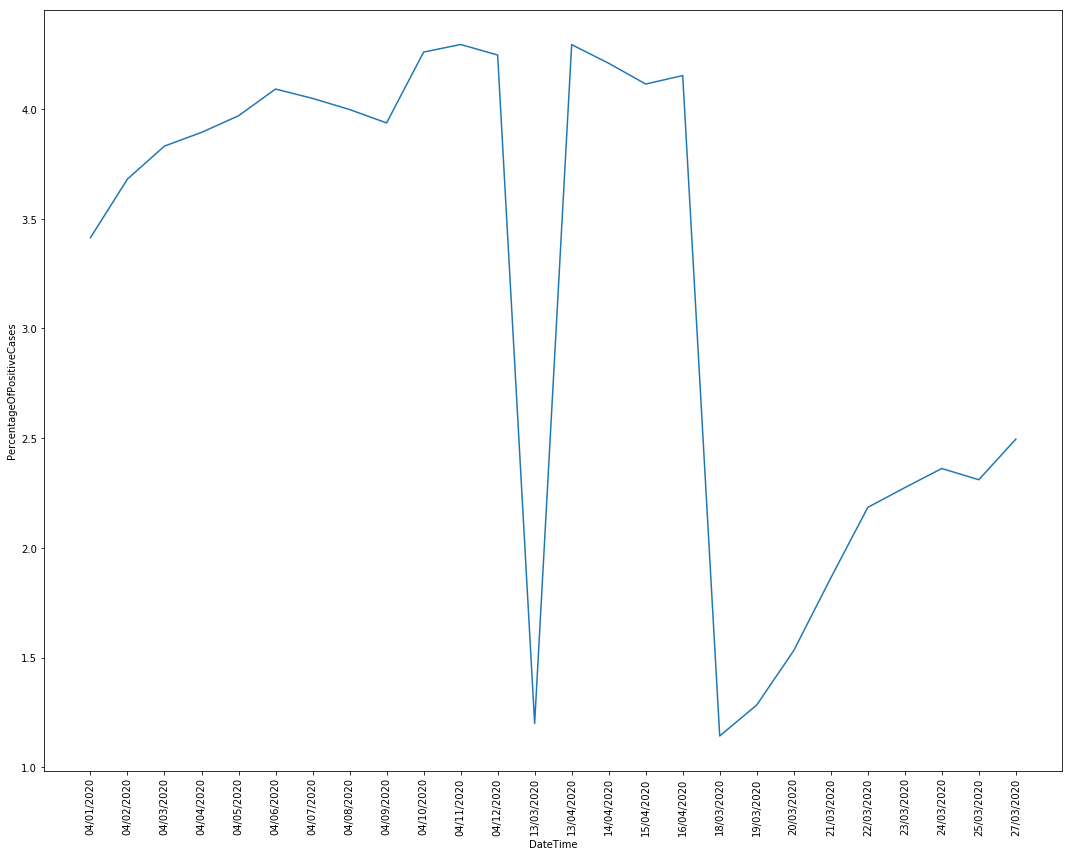

In [75]:
plt.figure(figsize=(15,12))
sns.lineplot(x='DateTime',y='PercentageOfPositiveCases',data=ICMRTestingDetails)
plt.xticks(rotation=90)
plt.tight_layout()

# Relation btw Positive cases & Total samples trend

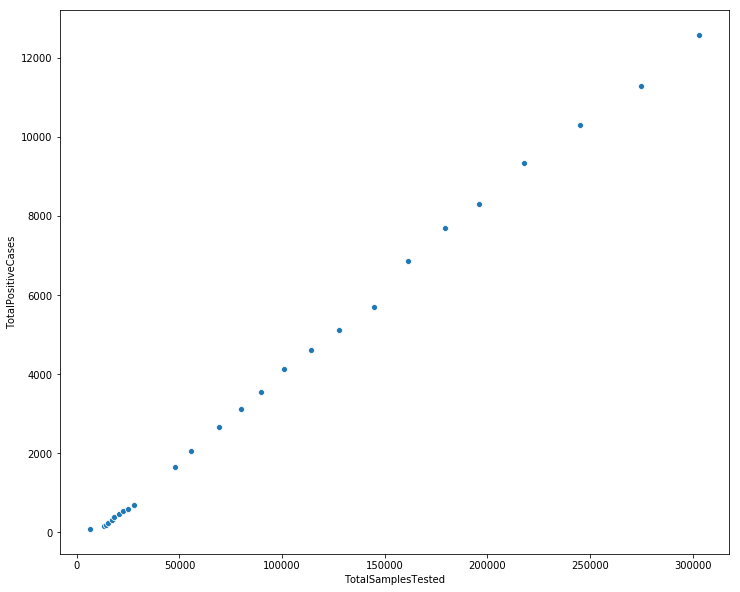

In [197]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='TotalSamplesTested',y='TotalPositiveCases',data=ICMRTestingDetails)
plt.savefig('images/Relation btw Positive cases & Total samples trend.png')

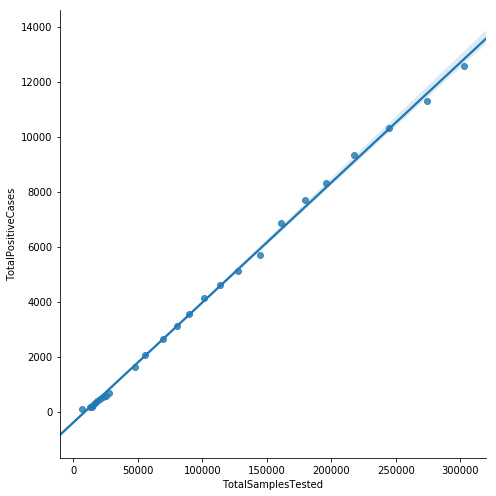

In [198]:
sns.lmplot('TotalSamplesTested','TotalPositiveCases',data=ICMRTestingDetails, height=7)
plt.savefig('images/Relation btw Positive cases & Total samples trend_regression.png')


In [107]:
labs_count = ICMRTestingLabs.groupby(by='state').count()
labs_count.reset_index(inplace=True)
labs_count = labs_count.sort_values(by=['lab'],ascending=False)
labs_count.head()

,state,lab,address,pincode,city,type
19,Maharashtra,36,36,36,36,36
28,Tamil Nadu,25,25,25,25,25
29,Telangana,18,18,18,18,18
31,Uttar Pradesh,17,17,17,17,17
8,Delhi,17,17,17,17,17


# Number of testing Labs by state

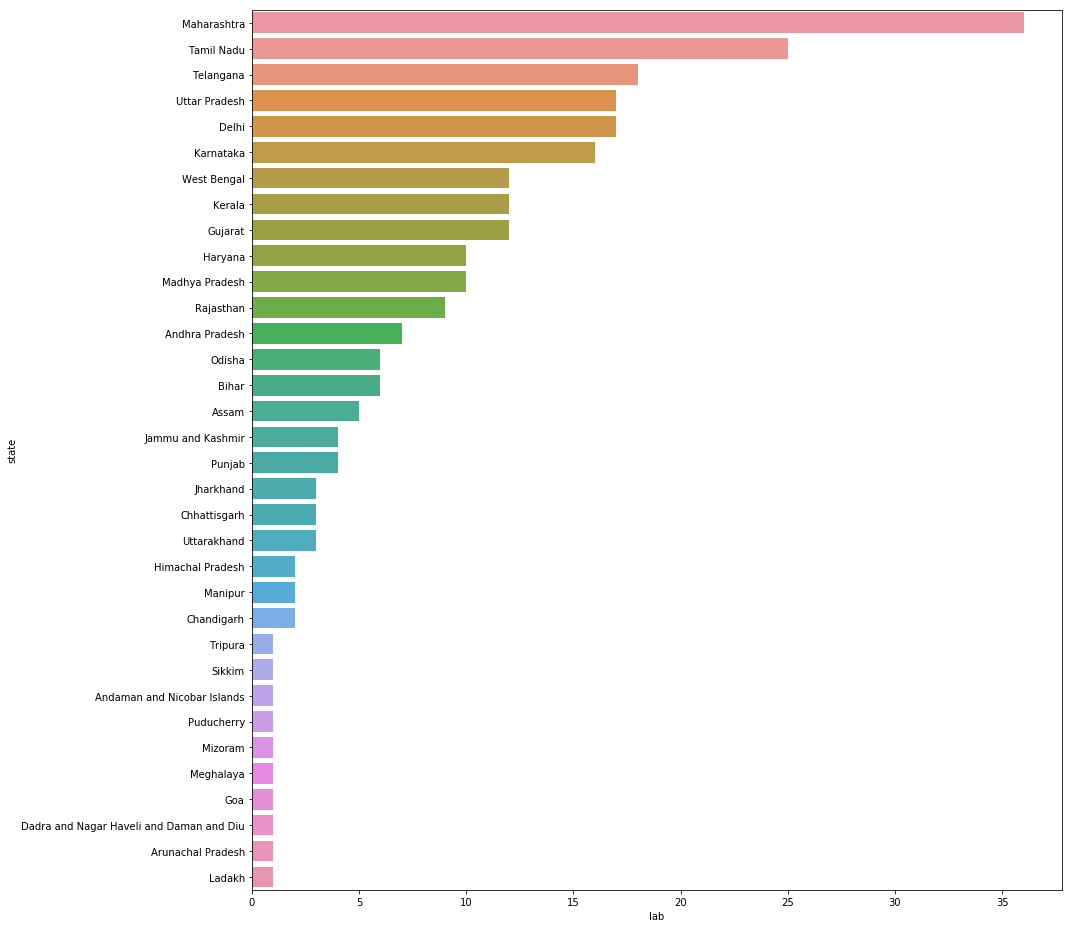

In [199]:
plt.figure(figsize=(15,13))
sns.barplot(x='lab',y='state',data=labs_count)
plt.tight_layout()
plt.savefig('images/Number of testing Labs by state.png')

In [166]:
ICMRTestingLabs.head()

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory


# Type of Labs by State

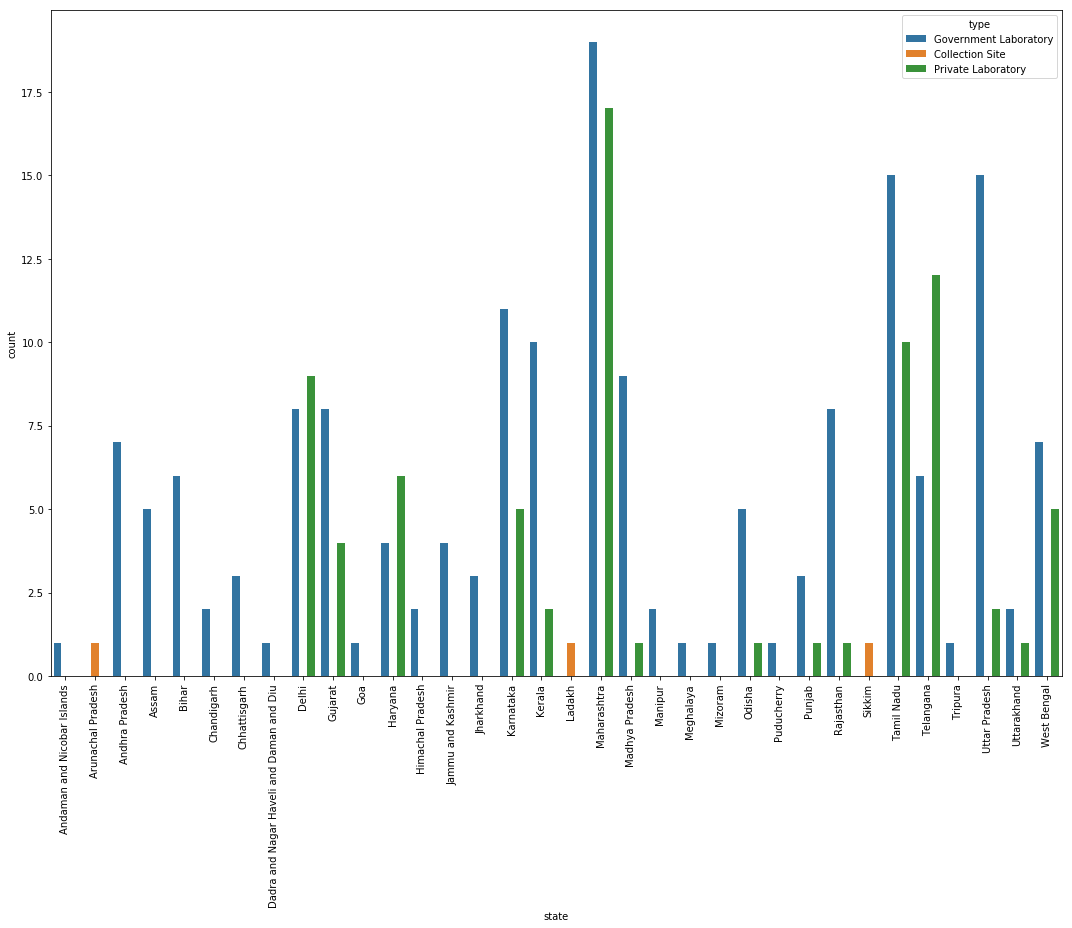

In [200]:
plt.figure(figsize=(15,13))
sns.countplot(x='state',hue='type',data=ICMRTestingLabs)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('images/Type of Labs by State.png')

In [135]:
IndividualDetails = pd.read_csv('IndividualDetails.csv')
StatewiseTestingDetails = pd.read_csv('StatewiseTestingDetails.csv')

In [139]:
IndividualDetails.fillna('nil',inplace=True)

# Confirmed Cases by Gender by States

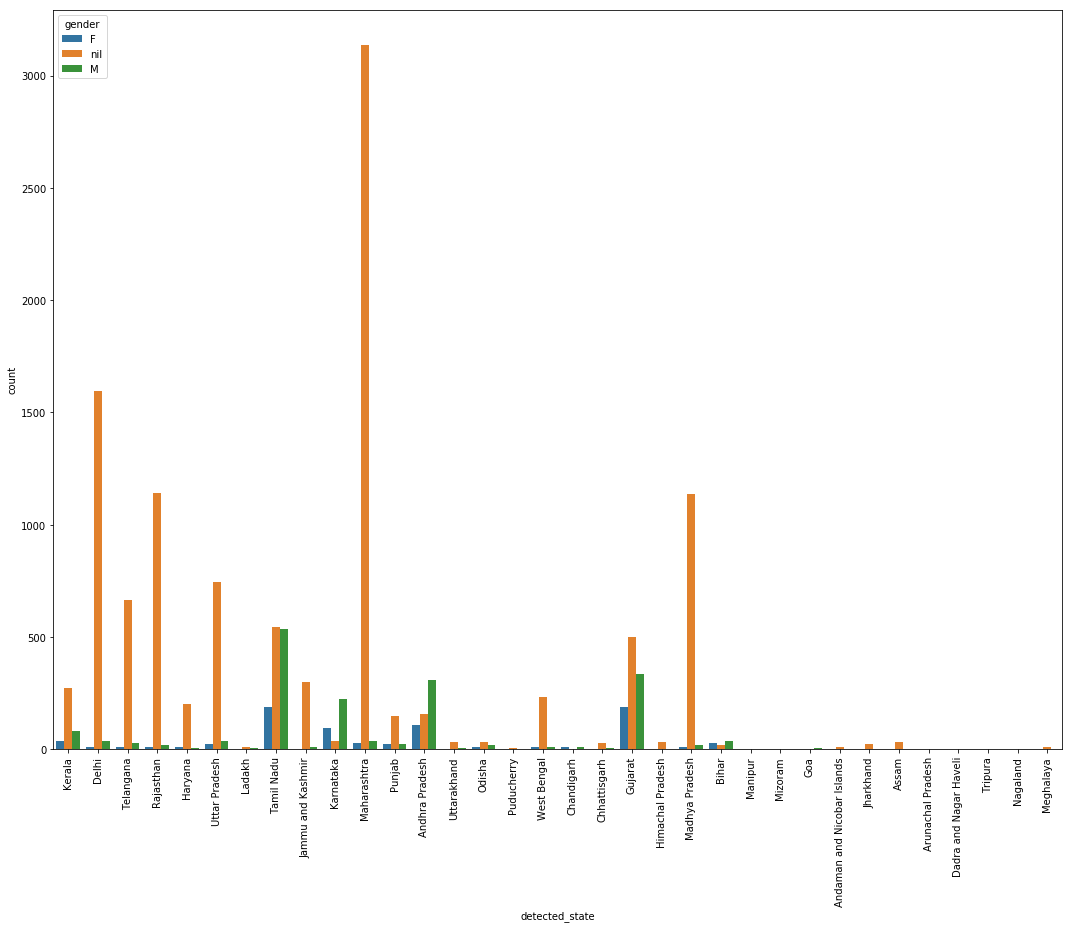

In [201]:
plt.figure(figsize=(15,13))
sns.countplot(x='detected_state',hue='gender',data=IndividualDetails)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('images/Confirmed Cases by Gender by States.png')

In [152]:
StatewiseTestingDetails_latest = StatewiseTestingDetails.groupby(by=['State']).last()
StatewiseTestingDetails_latest.reset_index(inplace=True)
StatewiseTestingDetails_latest_sorted_totalsamples = StatewiseTestingDetails_latest.sort_values(by=['TotalSamples'],ascending=False)
StatewiseTestingDetails_latest_sorted_positive = StatewiseTestingDetails_latest.sort_values(by=['Positive'],ascending=False)


# Testing Trend by State

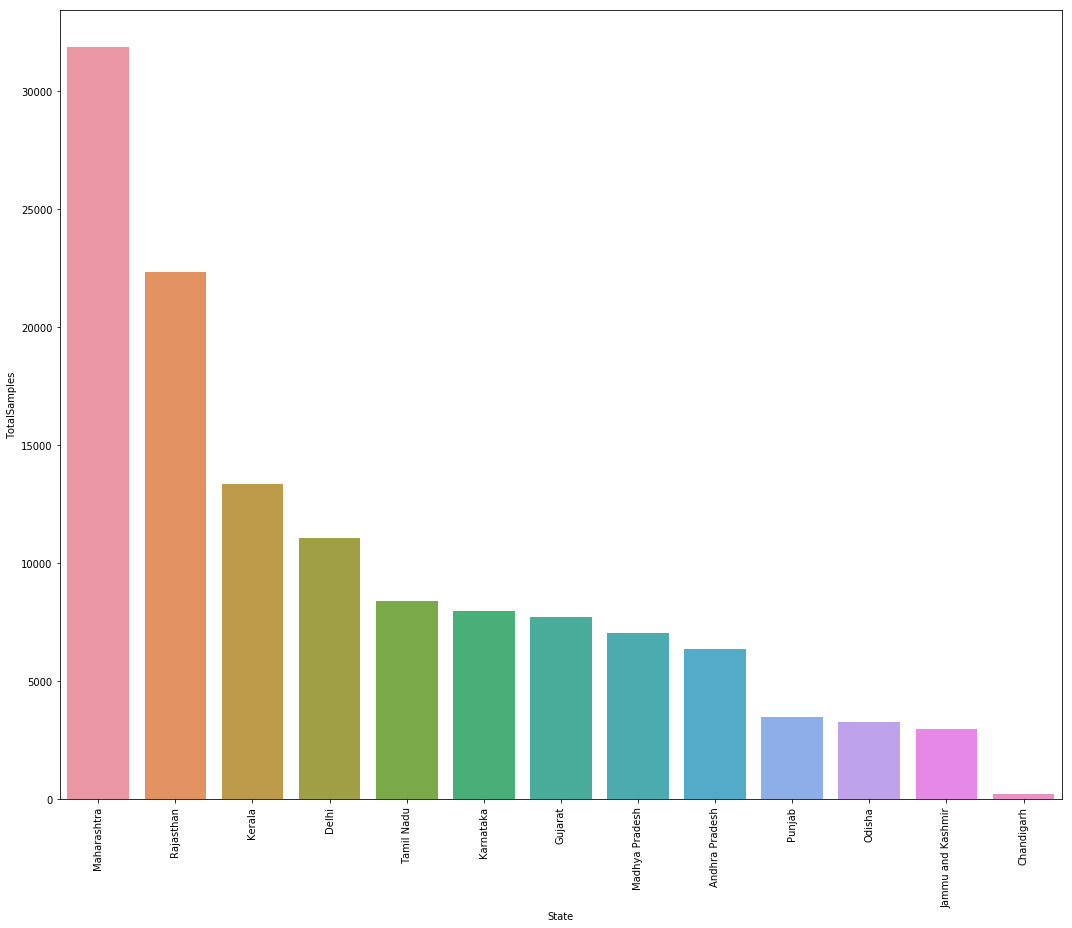

In [202]:
plt.figure(figsize=(15,13))
sns.barplot(x='State',y='TotalSamples',data=StatewiseTestingDetails_latest_sorted_totalsamples)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('images/Testing Trend by State.png')

# Positive Cases Trend by State

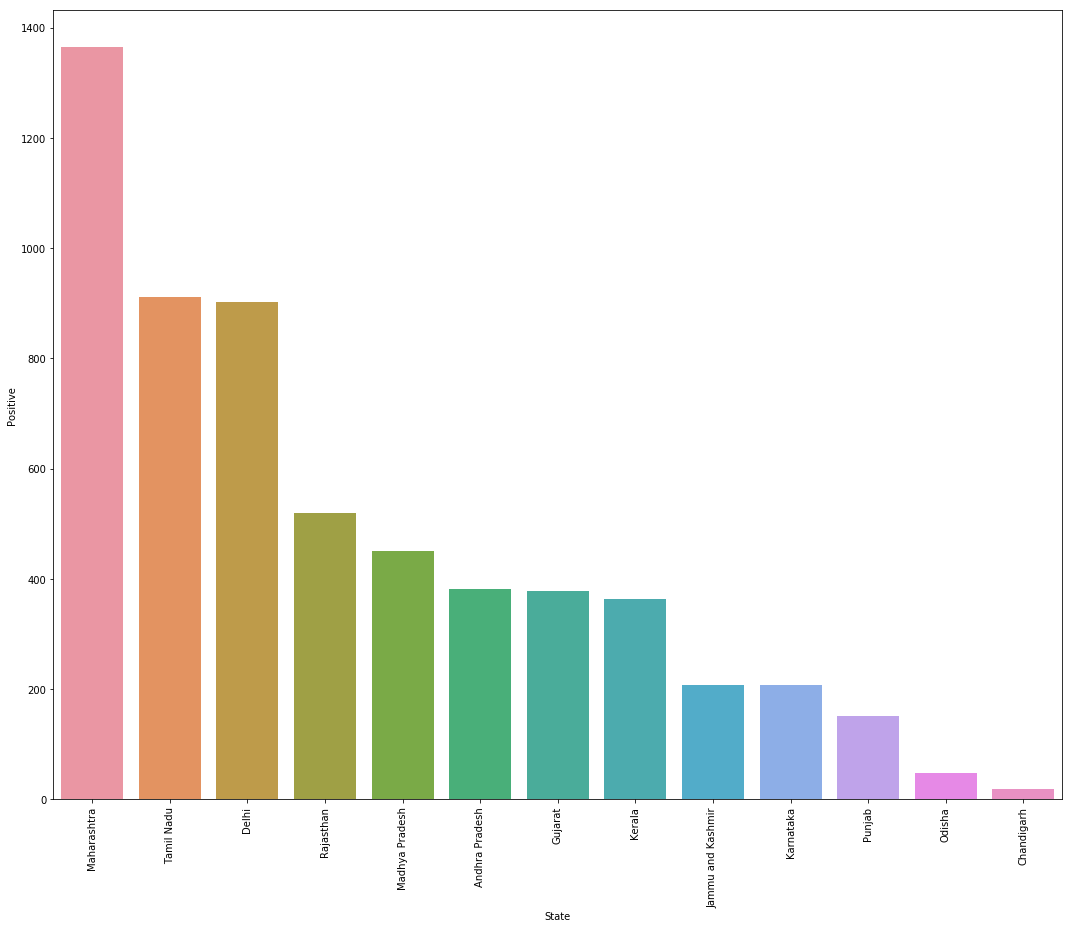

In [203]:
plt.figure(figsize=(15,13))
sns.barplot(x='State',y='Positive',data=StatewiseTestingDetails_latest_sorted_positive)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('images/Positive Cases Trend by State.png')


# Relation btwn Total Samples & Positive Cases

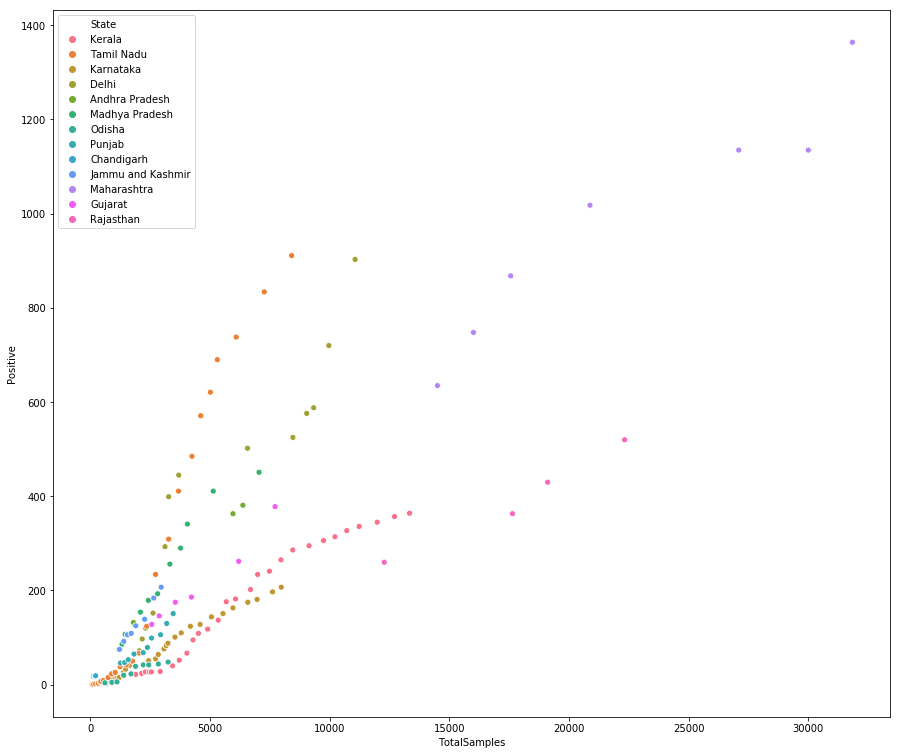

In [204]:
plt.figure(figsize=(15,13))
sns.scatterplot(x='TotalSamples',y='Positive',hue='State',data=StatewiseTestingDetails)
plt.savefig('images/Relation btwn Total Samples & Positive Cases.png')

# Regression line for Positive cases trend by state

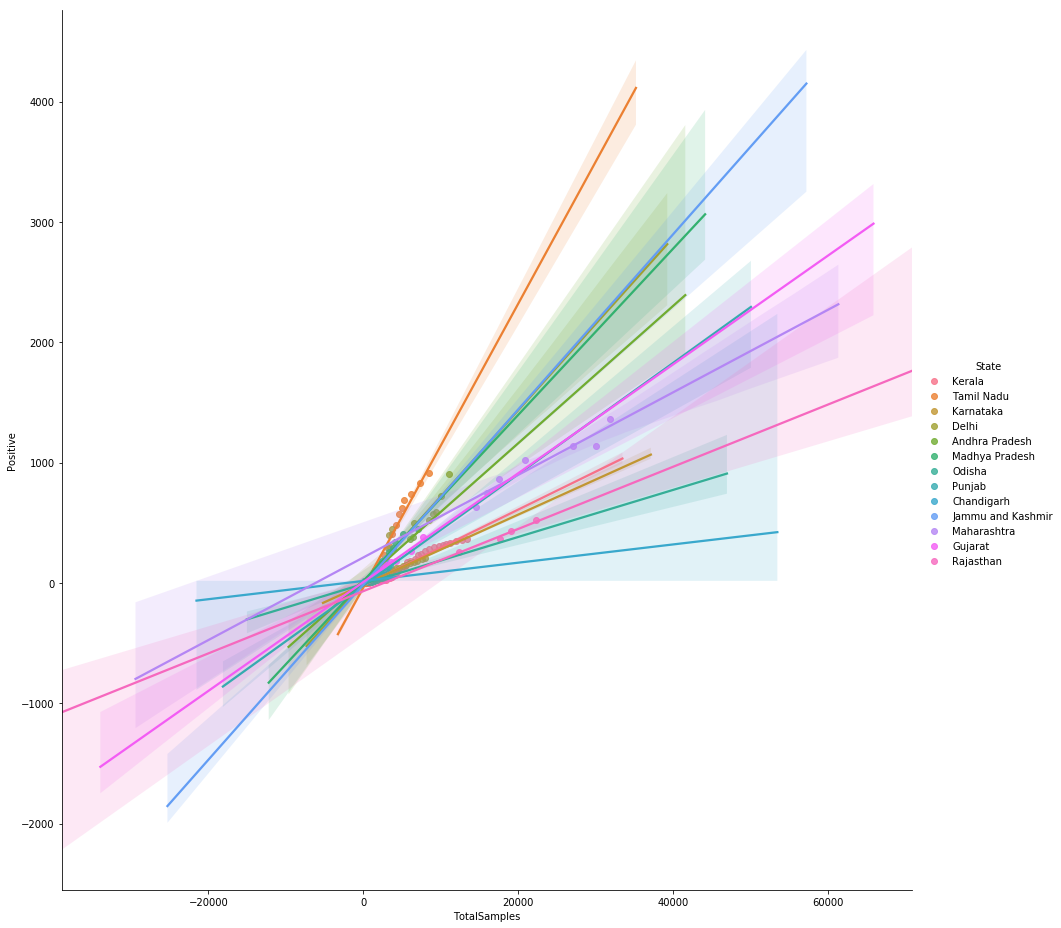

In [205]:
sns.lmplot(x='TotalSamples',y='Positive',hue='State',data=StatewiseTestingDetails,height=13)
plt.savefig('images/Regression line for Positive cases trend by state.png')